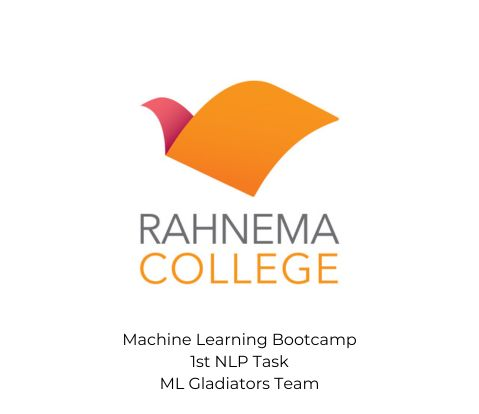

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#1-step">1st step. Data Gathering</a></li>
        <li><a href="#2-step">2nd step. Data Cleaning</a></li>
        <li><a href="#3-step">3rd step. POS Tagging</a></li>
        <li><a href="#4-step">4th step. NER</a></li>
        <li><a href="#5-step">5th step. Embedding</a></li>
        <li><a href="#6-step">6th step. Model</a></li>
    </ul>
</div>
<br>
<hr>


<div id="1-step">
    <h1>1st step. Data Gathering</h1>
</div>


In [1]:
# import necessary libraries
import pandas as pd

In [2]:
# connect to google drive and reading data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/dev.csv"
df = pd.read_csv(path)

<div id="2-step">
    <h1>2nd step. Data Cleaning</h1>
</div>


In [4]:
!pip install hazm

In [5]:
from hazm import *
import string

In [6]:
# Pre-instantiate the normalizer
normalizer = Normalizer()

def clean_persian_sentences(fa_sentence):
  # Remove any leading or trailing white space
  fa_sentence = fa_sentence.strip()
  # Replacing any sequence of whitespace characters with a single space
  fa_sentence = re.sub(r"\s+", " ", fa_sentence)
  # Converts sentence to a standard form, such as removing diacritics, correcting spacing, etc
  fa_sentence = normalizer.normalize(fa_sentence)
  # Replacing Similar Characters
  fa_sentence = fa_sentence.replace("آ", "ا").replace("ي", "ی").replace("ك", "ک")\
                  .replace("ئ","ی").replace("ِ","").replace("َ", "").replace("ُ", "")
  # remove punctuation
  table = str.maketrans('', '', string.punctuation)
  fa_sentence = fa_sentence.translate(table)
  return fa_sentence

In [8]:
def clean_english_sentences(en_sentence):
  # normalize unicode characters
  en_sentence = unicodedata.normalize('NFD', en_sentence).encode('ascii', 'ignore')
  en_sentence = en_sentence.decode('UTF-8')
  # Convert to lowercase and remove white spaces
  en_sentence = en_sentence.lower().strip()
  # remove punctuation
  table = str.maketrans('', '', string.punctuation)
  en_sentence = en_sentence.translate(table)
  return en_sentence

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

<div id="3-step">
    <h1>3rd step. POS Tagging</h1>
</div>


## NLTK POS Tagging

In [9]:
#install library
!pip install nltk

In [10]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [11]:
# Importing the NLTK library
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Sample text
text = "NLTK is a powerful library for natural language processing."

# Tokenize the text into words
words = word_tokenize(text) # This line is added to create the 'words' variable


# Performing PoS tagging
pos_tags = pos_tag(words)

# Displaying the PoS tagged result in separate lines
print("Original Text:")
print(text)

print("\nPoS Tagging Result:")
for word, pos_tag in pos_tags:
    print(f"{word}: {pos_tag}")

Original Text:
NLTK is a powerful library for natural language processing.

PoS Tagging Result:
NLTK: NNP
is: VBZ
a: DT
powerful: JJ
library: NN
for: IN
natural: JJ
language: NN
processing: NN
.: .


In the POS tagging output of NLTK (Natural Language Toolkit), each word is assigned a tag representing its part of speech. Below is a list of common POS tags and their meanings:

    JJ: Adjective (e.g., big, blue)
    JJR: Adjective, comparative (e.g., bigger, smarter)
    JJS: Adjective, superlative (e.g., biggest, smartest)
    NN: Noun, singular or mass (e.g., dog, music)
    NNS: Noun, plural (e.g., dogs, cars)
    NNP: Proper noun, singular (e.g., John, London)
    NNPS: Proper noun, plural (e.g., Americans, Scots)
    VB: Verb, base form (e.g., run, jump)
    VBD: Verb, past tense (e.g., ran, jumped)
    VBG: Verb, gerund or present participle (e.g., running, jumping)
    VBN: Verb, past participle (e.g., eaten, driven)
    VBP: Verb, non-3rd person singular present (e.g., run, jump)
    VBZ: Verb, 3rd person singular present (e.g., runs, jumps)
    RB: Adverb (e.g., quickly, well)
    RBR: Adverb, comparative (e.g., faster, better)
    RBS: Adverb, superlative (e.g., fastest, best)
    IN: Preposition or subordinating conjunction (e.g., in, on, because)
    DT: Determiner (e.g., the, a, an)
    PRP: Personal pronoun (e.g., I, he, she)
    PRP$: Possessive pronoun (e.g., my, his, her)
    MD: Modal (e.g., can, will, should)
    CC: Coordinating conjunction (e.g., and, but, or)
    CD: Cardinal number (e.g., one, two, 100)
    EX: Existential there (e.g., there is, there are)
    FW: Foreign word (e.g., d'accord)
    POS: Possessive ending (e.g., 's)
    RP: Particle (e.g., off, up)
    TO: to (e.g., to go, to run)
    UH: Interjection (e.g., wow, hey)
    WRB: Wh-adverb (e.g., where, when, why)
    WP: Wh-pronoun (e.g., who, what)
    WP$: Possessive wh-pronoun (e.g., whose)

## SPACY POS Tagging

In [12]:
#install library
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 83.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [13]:
#importing libraries
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Sample text
text = "SpaCy is a popular natural language processing library."

# Process the text with SpaCy
doc = nlp(text)

# Display the PoS tagged result
print("Original Text: ", text)
print("PoS Tagging Result:")
for token in doc:
    print(f"{token.text}: {token.pos_}")

Original Text:  SpaCy is a popular natural language processing library.
PoS Tagging Result:
SpaCy: PROPN
is: AUX
a: DET
popular: ADJ
natural: ADJ
language: NOUN
processing: NOUN
library: NOUN
.: PUNCT


## Persian POS Tagging with HAZM

In [ ]:
!pip install hazm

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
from hazm import POSTagger, word_tokenize

# Input Persian sentence
persian_text = "هضم یک کتابخانه برای پردازش زبان طبیعی است."

# Tokenize the sentence
words = word_tokenize(persian_text)

# Initialize the POS tagger
tagger = POSTagger(model='/content/drive/MyDrive/pos_tagger.model')

# Generate POS tags
pos_tags = tagger.tag(words)

# Output POS tags
for word, tag in pos_tags:
    print(f'Word: {word}\tPOS: {tag}')


Word: هضم	POS: NOUN,EZ
Word: یک	POS: NUM
Word: کتابخانه	POS: NOUN
Word: برای	POS: ADP,EZ
Word: پردازش	POS: NOUN,EZ
Word: زبان	POS: NOUN,EZ
Word: طبیعی	POS: ADJ
Word: است	POS: VERB
Word: .	POS: PUNCT


## Persian POS Tagging with STANZA

In [19]:
#install library
!pip install stanza


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.1/990.1 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 27.3 MB/s eta 0:00:00


In [20]:
import stanza
stanza.download('fa')  # 'fa' is the code for Persian


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: fa (Persian) ...


INFO:stanza:Downloaded file to /root/stanza_resources/fa/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [21]:
import stanza

# Initialize the Persian pipeline
nlp = stanza.Pipeline('fa')

# Input Persian text
persian_text = "این یک کتابخانه برای پردازش زبان طبیعی است"

# Process the text
doc = nlp(persian_text)

# Extract and print POS tags
for sentence in doc.sentences:
    for word in sentence.words:
        print(f'Word: {word.text}\tPOS: {word.pos}')


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |
| depparse  | perdt_charlm   |
| ner       | arman          |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed

Word: این	POS: PRON
Word: یک	POS: NUM
Word: کتابخانه	POS: NOUN
Word: برای	POS: ADP
Word: پردازش	POS: NOUN
Word: زبان	POS: NOUN
Word: طبیعی	POS: ADJ
Word: است	POS: AUX


<div id="4-step">
    <h1>4th step. NER</h1>
</div>


## NER in English

In [88]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 78.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

In [ ]:
# Loading the English model
spacy_en_model = spacy.load('en_core_web_sm')

In [ ]:
text = "Apple is looking at buying U.K. startup for $1 billion"
# Processing the text
doc = spacy_en_model(text)
# Extracting Named Entities
for entity in doc.ents:
    print(f'{entity.text}: {entity.label_}')

In [ ]:
# Visualiza the result
spacy.displacy.render(doc, style='ent')

## NER in Persian

In [ ]:
!pip install sentencepiece
!pip install transformers

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForTokenClassification  # for pytorch
from transformers import TFAutoModelForTokenClassification  # for tensorflow
from transformers import pipeline

# model_name_or_path = "HooshvareLab/bert-fa-zwnj-base-ner"  # Roberta
# model_name_or_path = "HooshvareLab/roberta-fa-zwnj-base-ner"  # Roberta
model_name_or_path = "HooshvareLab/distilbert-fa-zwnj-base-ner"  # Distilbert
# model_name_or_path = "HooshvareLab/albert-fa-zwnj-base-v2-ner"  # Albert

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)

model = AutoModelForTokenClassification.from_pretrained(model_name_or_path)  # Pytorch
# model = TFAutoModelForTokenClassification.from_pretrained(model_name_or_path)  # Tensorflow

In [ ]:
nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "در سال ۲۰۱۳ درگذشت و آندرتیکر و کین برای او مراسم یادبود گرفتند."

ner_results = nlp(example)
print(ner_results)

<div id="5-step">
    <h1>5th step. Embedding</h1>
</div>


## TF-IDF

In [62]:
# import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
def preprocess_text_v2(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\b\w{1,2}\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


df['processed_en_text'] = df['en_text'].apply(preprocess_text_v2)

In [65]:
# Calculate TF-IDF
tfidf_vectorizer_en = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')
tfidf_matrix_en = tfidf_vectorizer_en.fit_transform(df['processed_en_text'])

In [66]:
# Extracting non-zero values ​​from the TF-IDF matrix
rows, cols = tfidf_matrix_en.nonzero()
non_zero_values = tfidf_matrix_en[rows, cols]

In [67]:
# Convert non zero values ​​to an array
non_zero_values = np.array(non_zero_values).flatten()

In [68]:
# Create a DataFrame of non-zero TF-IDF values

df_tfidf = pd.DataFrame({
    'sentence_index': rows + 1,
    'feature': [tfidf_vectorizer_en.get_feature_names_out()[col] for col in cols],
    'tfidf_value': non_zero_values
})

In [ ]:
df_tfidf.to_csv('non_zero_tfidf_values.csv',index=False)

## Word2Vec

In [46]:
import pandas as pd
import re
import nltk
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [47]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [48]:
def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'\d+','',text)
  text = re.sub(r'\W+',' ',text)
  text = re.sub(r'\b\w{1,2}\b','',text)
  text = re.sub(r'\s+',' ',text).strip()
  return text


In [49]:
df['processd_en_text'] = df['en_text'].apply(preprocess_text)

In [51]:
df['tokenized_text'] = df['processd_en_text'].apply(word_tokenize)

In [53]:
stop_words = set(stopwords.words('english'))
df['filtered_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])

In [55]:
model = Word2Vec(sentences=df['filtered_text'], vector_size=100, window=5, min_count=2, workers=4)

In [56]:
word = 'dad'
if word in model.wv.key_to_index:
    print(f"Word2Vec for '{word}': {model.wv[word]}")
else:
    print(f"The word '{word}' is not in the vocabulary.")

Word2Vec for 'dad': [ 7.73680815e-03  5.34812175e-03  5.18464157e-03  1.01445527e-04
  7.24970968e-03  7.32317753e-03 -9.06204246e-03 -6.95402827e-03
 -3.12795455e-04 -9.55409370e-03  7.85586797e-03  5.26404008e-03
 -7.63119338e-03 -8.26197304e-03 -5.22124022e-03 -8.07660259e-03
  6.19808445e-04 -1.05810296e-02 -8.41517467e-03 -6.83528651e-03
 -5.46664419e-03 -5.48517378e-03  3.60254315e-03  9.38422792e-03
 -4.81983507e-03 -1.27704220e-03 -2.86166556e-03  1.91177207e-03
 -4.64137690e-03 -3.71501897e-03 -6.35460531e-03 -1.23580429e-03
 -4.19427501e-03  5.33469487e-03 -1.58676831e-03  7.88654853e-03
 -1.79997541e-03  5.70199266e-03  9.70869511e-03  3.46064684e-03
  2.59727752e-03 -3.65306507e-03  4.02544596e-04  5.92045661e-04
  9.96548403e-03 -2.61597265e-03  8.84374231e-03  3.55136138e-03
  9.40944254e-03  7.79812690e-03 -6.41180854e-03 -8.56043026e-03
  6.41282182e-03 -8.87298305e-03 -5.53588010e-03 -4.11623530e-03
 -2.71863164e-03  7.99499452e-03  2.82169157e-03 -5.72658889e-03
  8.8

In [58]:
model.save("word2vec.model")

In [59]:
similar_words = model.wv.most_similar('dad', topn=5)
print(" silimal words 'dad':", similar_words)

 silimal words 'dad': [('charlie', 0.31584247946739197), ('amount', 0.29757949709892273), ('switzerland', 0.292705237865448), ('occurred', 0.28508391976356506), ('anyway', 0.28202754259109497)]


In [60]:
words = list(model.wv.index_to_key)
word_vectors = [model.wv[word] for word in words]
df_word_vectors = pd.DataFrame(word_vectors, index=words)

In [61]:
df_word_vectors.to_csv('word_vectors.csv')

## GloVe

In [70]:
!pip install glove-python3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.0/327.0 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for glove-python3: filename=glove_python3-0.1.0-cp310-cp310-linux_x86_64.whl size=1065514 sha256=c08fd4bdec32a716f9fd9fa50d686c458215d153f8a0ec2240a450a253a1021e
  Stored in directory: /root/.cache/pip/wheels/fe/2f/79/34314d44a0907e90e323c8c182ec23f126eb460829e02d98cf
Successfully built glove-python3


In [94]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from glove import Corpus, Glove
import nltk

In [95]:
nltk.download('punkt')
tokenized_en_data = df['en_text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### English

In [96]:
corpus_en = Corpus()
corpus_en.fit(tokenized_en_data, window=10)
glove_en = Glove(no_components=100, learning_rate=0.05)
glove_en.fit(corpus_en.matrix, epochs=30, no_threads=4, verbose=True)
glove_en.add_dictionary(corpus_en.dictionary)

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [97]:
words_en = list(glove_en.dictionary.keys())
vectors_en = [glove_en.word_vectors[glove_en.dictionary[word]] for word in words_en]
df_en = pd.DataFrame(vectors_en, index=words_en)
df_en.to_csv('glove_model_en.csv', index=False)

### Persian

In [98]:
tokenized_fa_data = df['fa_text'].apply(word_tokenize)

In [99]:
corpus_fa = Corpus()
corpus_fa.fit(tokenized_fa_data, window=10)
glove_fa = Glove(no_components=100, learning_rate=0.05)
glove_fa.fit(corpus_fa.matrix, epochs=30, no_threads=4, verbose=True)
glove_fa.add_dictionary(corpus_fa.dictionary)

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [100]:
words_fa = list(glove_fa.dictionary.keys())
vectors_fa = [glove_fa.word_vectors[glove_fa.dictionary[word]] for word in words_fa]
df_fa = pd.DataFrame(vectors_fa, index=words_fa)
df_fa.to_csv('glove_model_fa.csv', index=False)

## FastText

In [ ]:
!pip install gensim

In [101]:
from gensim.models import FastText
import pandas as pd

In [102]:
tokenized_en_data = df['en_text'].dropna().apply(lambda x: x.split()).tolist()
tokenized_fa_data = df['fa_text'].dropna().apply(lambda x: x.split()).tolist()

In [103]:
model_en = FastText(vector_size=100, window=5, min_count=1, epochs=10)
model_en.build_vocab(tokenized_en_data)
model_en.train(tokenized_en_data, total_examples=len(tokenized_en_data), epochs=10)
model_en.save('fasttext_model_en.model')

In [104]:
words_en = list(model_en.wv.key_to_index.keys())
vectors_en = [model_en.wv[word] for word in words_en]
df_en = pd.DataFrame(vectors_en, index=words_en)
df_en.to_csv('fasttext_model_en.csv')

In [105]:
model_fa = FastText(vector_size=100, window=5, min_count=1, epochs=10)
model_fa.build_vocab(tokenized_fa_data)
model_fa.train(tokenized_fa_data, total_examples=len(tokenized_fa_data), epochs=10)
model_fa.save('fasttext_model_fa.model')

In [106]:
words_fa = list(model_fa.wv.key_to_index.keys())
vectors_fa = [model_fa.wv[word] for word in words_fa]
df_fa = pd.DataFrame(vectors_fa, index=words_fa)
df_fa.to_csv('fasttext_model_fa.csv')

## Bert

In [78]:
# import necassary libraries
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import pandas as pd

In [79]:
# load model and tokenizer
model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

In [80]:
def get_bert_embeddings(texts):
    model.eval()
    embeddings = []
    with torch.no_grad():
        for text in texts:
            # Tokenize text and prepare input
            encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
            # Generate output
            output = model(**encoded_input)
            # Use the mean of the last hidden state as the embedding
            embedding = output.last_hidden_state.mean(dim=1).squeeze().numpy()
            embeddings.append(embedding)
    return embeddings

In [81]:
embeddings_eng = get_bert_embeddings(df["en_text"])
embeddings_fa = get_bert_embeddings(df["fa_text"])

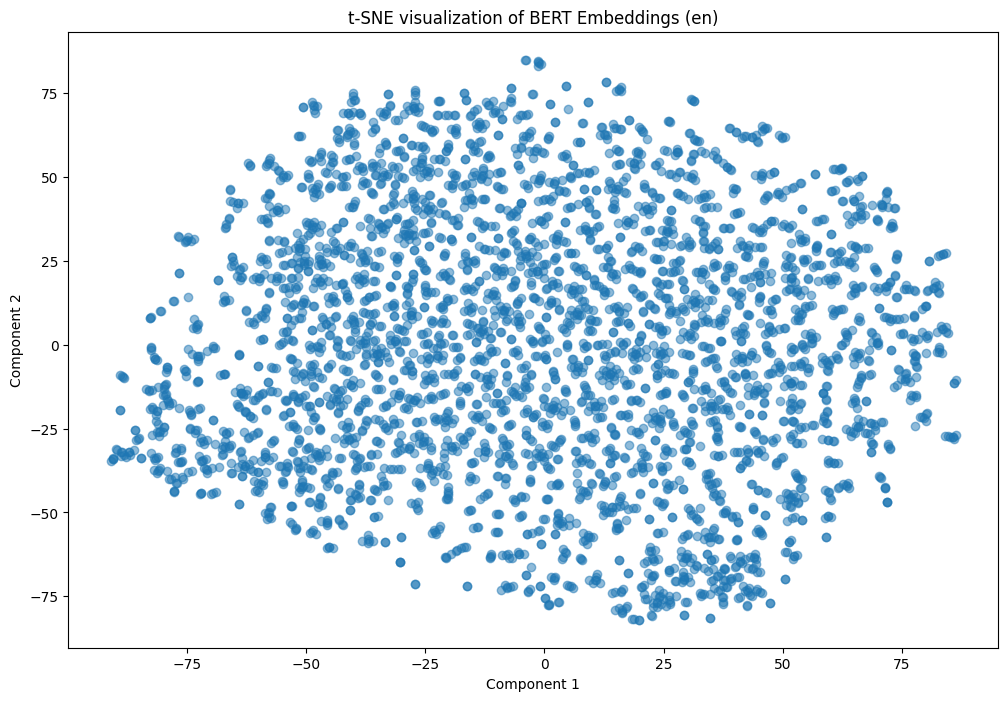

In [92]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'embeddings' is your list of embeddings from BERT
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # Use 2 components for 2D visualization
reduced_embeddings = tsne.fit_transform(np.array(embeddings_eng))

# Plot the results with labels
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5)
plt.title('t-SNE visualization of BERT Embeddings (en)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


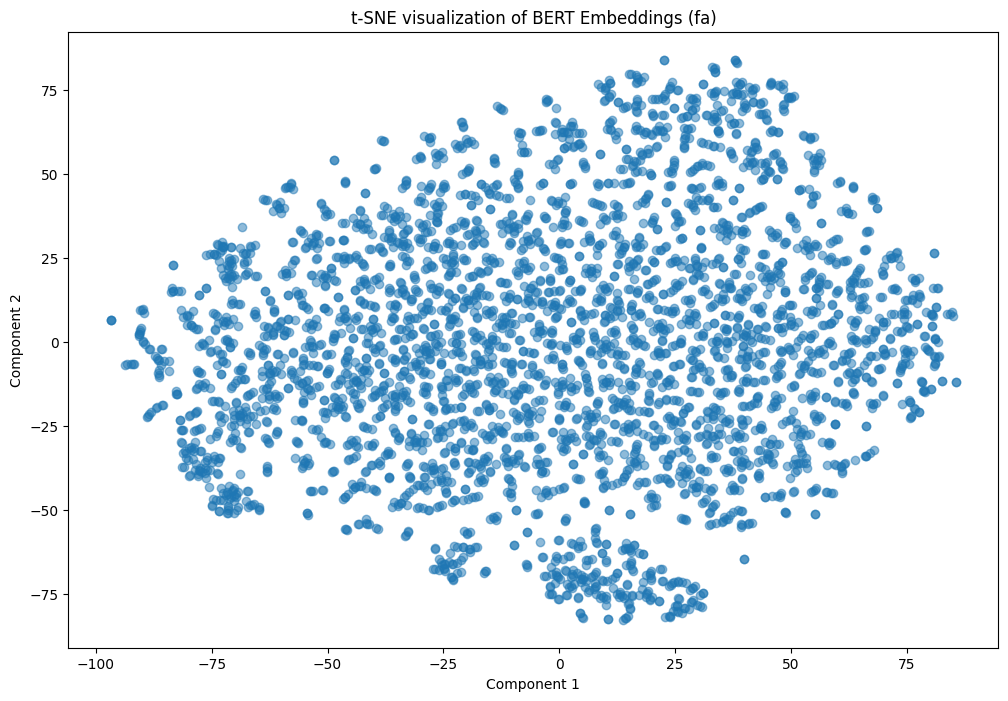

In [93]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'embeddings' is your list of embeddings from BERT
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # Use 2 components for 2D visualization
reduced_embeddings = tsne.fit_transform(np.array(embeddings_fa))

# Plot the results with labels
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5)
plt.title('t-SNE visualization of BERT Embeddings (fa)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


<div id="6-step">
    <h1>6th step. Model</h1>
</div>


## RNN Model

In [ ]:
!pip install hazm

In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import re
import random
import os
import hazm
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, RandomSampler
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = "/content/drive/MyDrive/dev.csv"
df = pd.read_csv(path)

In [ ]:
from hazm import *
import string

In [ ]:
# Pre-instantiate the normalizer
normalizer = Normalizer()

def clean_persian_sentences(fa_sentence):
  # Remove any leading or trailing white space
  fa_sentence = fa_sentence.strip()
  # Replacing any sequence of whitespace characters with a single space
  fa_sentence = re.sub(r"\s+", " ", fa_sentence)
  # Converts sentence to a standard form, such as removing diacritics, correcting spacing, etc
  fa_sentence = normalizer.normalize(fa_sentence)
  # Replacing Similar Characters
  fa_sentence = fa_sentence.replace("آ", "ا").replace("ي", "ی").replace("ك", "ک")\
                  .replace("ئ","ی").replace("ِ","").replace("َ", "").replace("ُ", "")
  # remove punctuation
  table = str.maketrans('', '', string.punctuation)
  fa_sentence = fa_sentence.translate(table)
  return fa_sentence

def clean_english_sentences(en_sentence):
  # normalize unicode characters
  en_sentence = unicodedata.normalize('NFD', en_sentence).encode('ascii', 'ignore')
  en_sentence = en_sentence.decode('UTF-8')
  # Convert to lowercase and remove white spaces
  en_sentence = en_sentence.lower().strip()
  # remove punctuation
  table = str.maketrans('', '', string.punctuation)
  en_sentence = en_sentence.translate(table)
  return en_sentence

In [ ]:
persian_sentences= df["fa_text"]
english_sentences= df["en_text"]

In [ ]:
import torch
from transformers import BertTokenizer, BertModel


In [ ]:
model_name = 'bert-base-multilingual-cased'
bert_tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name)


In [ ]:
from torch.nn.utils.rnn import pad_sequence

def get_bert_embeddings(sentences, max_length):
    embeddings = []
    for sentence in sentences:
        inputs = bert_tokenizer(sentence, return_tensors='pt', padding='max_length', truncation=True, max_length=max_length)
        with torch.no_grad():
            outputs = bert_model(**inputs)
            # Obtain the embeddings for the entire sequence instead of just the [CLS] token
            embeddings.append(outputs.last_hidden_state.squeeze(0))

    # Pad the sequences of embeddings to have uniform dimensions
    embeddings_padded = pad_sequence(embeddings, batch_first=True, padding_value=0.0)
    return embeddings_padded.numpy()  # Ensure the tensor is converted to numpy array properly


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# Set the maximum length for sequences
max_length = 10
#Generate BERT embeddings for the English sentences
english_embeddings = get_bert_embeddings(english_sentences, max_length)

# Tokenize and pad Persian sentences
def tokenize_and_pad(sentences, max_length):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    sequences = tokenizer.texts_to_sequences(sentences)
    sequences_padded = pad_sequences(sequences, maxlen=max_length, padding='post')
    return sequences_padded, tokenizer

# Tokenize the Persian sentences
persian_sequences, persian_tokenizer = tokenize_and_pad(persian_sentences, max_length)

# Get the size of the Persian vocabulary
num_persian_tokens = len(persian_tokenizer.word_index) + 1


In [ ]:
# Tokenize and pad the Persian sentences
persian_sequences, persian_tokenizer = tokenize_and_pad(persian_sentences, max_length)

# Get the size of the Persian vocabulary
num_persian_tokens = len(persian_tokenizer.word_index) + 1

# Reshape Persian sequences for training
persian_sequences = np.expand_dims(persian_sequences, axis=-1)

# Step 4: Build the RNN model
model = Sequential()

# SimpleRNN Layer with input shape based on BERT embeddings (batch_size, sequence_length, embedding_dim)
model.add(SimpleRNN(128, input_shape=(english_embeddings.shape[1], english_embeddings.shape[2]), return_sequences=True))

# Dense layer to map to Persian token space
model.add(Dense(num_persian_tokens, activation='softmax'))

# Step 5: Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
model.fit(english_embeddings, persian_sequences, epochs=10, verbose=1)
model.save('/content/drive/MyDrive/model_rnn.h5')

# Step 7: Define function to translate English sentences into Persian
def translate(sentence):
    # Get BERT embeddings for the input sentence
    embeddings = get_bert_embeddings([sentence], max_length)

    # Predict the Persian token sequence
    predictions = model.predict(embeddings)

    # Convert predictions to Persian words
    predicted_sentence = []
    for i in range(predictions.shape[1]):
        predicted_token = np.argmax(predictions[0, i])
        if predicted_token != 0:  # Ignore padding token
            predicted_word = persian_tokenizer.index_word.get(predicted_token, '')
            predicted_sentence.append(predicted_word)

    return ' '.join(predicted_sentence)

# Example usage of the translate function
print(translate("Good morning"))

## LSTM

In [82]:
!pip install hazm

In [83]:
import pandas as pd
import numpy as np
import hazm
import torch
from transformers import BertTokenizer, BertModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [84]:
english_sentences=df['en_text']
persian_sentences=df['fa_text']


In [85]:
# Load pre-trained BERT model and tokenizer
bert_model_name = 'bert-base-uncased'
bert_tokenizer = BertTokenizer.from_pretrained(bert_model_name)
bert_model = BertModel.from_pretrained(bert_model_name)

# Function to generate BERT embeddings for sentences
def get_bert_embeddings(sentences, max_length):
    embeddings = []
    for sentence in sentences:
        # Tokenize the sentence and get the input IDs for BERT
        inputs = bert_tokenizer(sentence, return_tensors='pt', padding='max_length', truncation=True, max_length=max_length)
        with torch.no_grad():
            outputs = bert_model(**inputs)
            # Get the embeddings for the [CLS] token
            embeddings.append(outputs.last_hidden_state.squeeze(0).numpy())

    return pad_sequences(embeddings, maxlen=max_length, padding='post', dtype='float32')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [86]:
# Set the maximum length for sequences
max_length = 20
#Generate BERT embeddings for the English sentences
english_embeddings = get_bert_embeddings(english_sentences, max_length)

# Tokenize and pad Persian sentences
def tokenize_and_pad(sentences, max_length):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    sequences = tokenizer.texts_to_sequences(sentences)
    sequences_padded = pad_sequences(sequences, maxlen=max_length, padding='post')
    return sequences_padded, tokenizer

# Tokenize the Persian sentences
persian_sequences, persian_tokenizer = tokenize_and_pad(persian_sentences, max_length)

# Get the size of the Persian vocabulary
num_persian_tokens = len(persian_tokenizer.word_index) + 1


In [87]:
# Build the LSTM model
model = Sequential()

# Add LSTM layer (input size is 768 due to BERT embedding size)
model.add(LSTM(256, input_shape=(max_length, 768), return_sequences=True))

# Dense layer to map the LSTM outputs to the size of the Persian vocabulary
model.add(Dense(num_persian_tokens, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Summary of the model
model.summary()

# Convert Persian sequences to the correct shape for model training (2D -> 3D for sparse_categorical_crossentropy)
persian_sequences = np.expand_dims(persian_sequences, -1)

# Train the model
model.fit(english_embeddings, persian_sequences, epochs=10, batch_size=16)
model.save('/content/drive/MyDrive/model_lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 256)             │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20, 11397)           │       2,929,029 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,978,629 (15.18 MB)

 Trainable params: 3,978,629 (15.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 248s 983ms/step - loss: 5.2401
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 261s 977ms/step - loss: 3.9942
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 258s 961ms/step - loss: 3.8013
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 239s 957ms/step - loss: 3.6889
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - loss: 3.4381 
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 251s 955ms/step - loss: 3.2359
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 264s 964ms/step - loss: 2.9796
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 270s 995ms/step - loss: 2.7260
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 258s 980ms/step - loss: 2.4050
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 251s 936ms/step - loss: 2.1405


In [90]:
#load saving model
from keras.models import load_model
model = load_model('model_lstm.h5')

In [91]:
# Function to translate a new English sentence using the trained model
def translate_sentence(input_sentence):
    # Generate the BERT embedding for the input sentence
    input_embedding = get_bert_embeddings([input_sentence], max_length)

    # Predict the Persian translation (as token indices)
    predictions = model.predict(input_embedding)

    # Convert the predictions to Persian words
    predicted_sentence = []
    for i in range(predictions.shape[1]):
        predicted_token = np.argmax(predictions[0, i])
        if predicted_token != 0:  # Ignore padding token
            predicted_word = persian_tokenizer.index_word.get(predicted_token, '')
            predicted_sentence.append(predicted_word)

    # Join the predicted words into a sentence
    return ' '.join(predicted_sentence)

# Test translation with a new English sentence
test_sentence = "Hello"
translated_sentence = translate_sentence(test_sentence)
print(f"English: {test_sentence}")
print(f"Persian: {translated_sentence}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
English: Hello
Persian: من


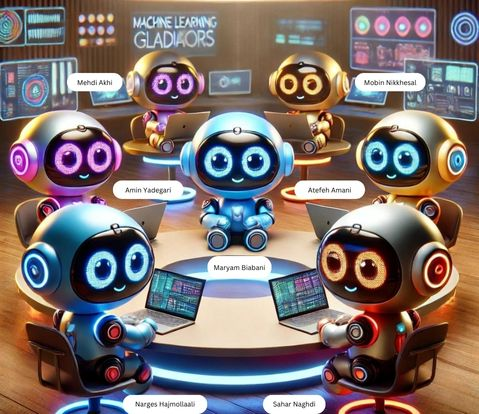